# Signals and Systems – Coding Homework 2  
**Problem 4.12.2: LTI System Response via Numerical Convolution**

**Name:** Mohammad Sadegh Rezaei  
**Student ID:** 401121163  
**University:** Hamedan University of Technology  
**Course:** Signals and Systems  
**Homework:** Coding Homework 2  

---

## Problem Statement

Consider a system characterized by the following impulse response:

$$
h(t) = e^{-2t}\,u(t-1)
$$

The objective is to compute and plot the output of the system when the input signal is the rectangular pulse:

$$
x(t) = u(t) - u(t-2)
$$

---

## Assumptions and Modeling Notes

- The system is assumed to be **Linear and Time‑Invariant (LTI)**.
- The impulse response is **causal**, since:
  
  $$
  h(t) = 0 \quad \text{for} \quad t < 1
  $$

- The output signal is obtained using the **convolution integral**:

  $$
  y(t) = x(t) * h(t)
  $$

- Continuous‑time signals are approximated using discrete‑time sampling.
- Numerical convolution is used instead of analytical integration.
- The sampling interval used for accurate approximation is:

  $$
  \Delta t = 0.1~\text{s}
  $$

# Code Implementation

### Part 1: Input Signal Definition and Plotting

<p>
In this part, we define the input signal <b>x(t)</b> and plot it.
</p>

<ol>
<li><b>Sampling Parameters</b><br>
    - <code>dt = 0.1</code> → Time step for discrete sampling.<br>
    - <code>t = np.arange(0, 10, dt)</code> → Time vector from 0 to 10 seconds.
</li>

<li><b>Definition of Input Signal</b><br>
    The input signal is a rectangular pulse:
    <br>
    <math>x(t) = u(t) - u(t-2)</math>
    <br>
    - This creates a pulse of amplitude 1 between t = 0 and t = 2 seconds.<br>
    - Implemented using <code>np.where((t >= 0) & (t < 2), 1.0, 0.0)</code> which assigns 1 within the interval and 0 elsewhere.
</li>

<li><b>Plotting</b><br>
    - The signal is plotted with blue color and line width 2.<br>
    - Title, axis labels, grid, and legend are added for clarity.
</li>
</ol>

<p>
At this stage, only the input signal is prepared and visualized. In the next parts, the impulse response and convolution output will be analyzed.
</p>


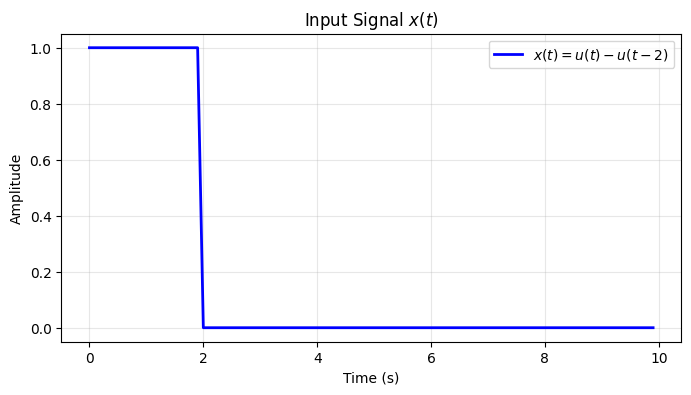

In [21]:
# ----------------------------------
# Part 1: Define and plot the input signal
# ----------------------------------

import numpy as np
import matplotlib.pyplot as plt

# Sampling parameters
dt = 0.1                                # Time step for discretization
t = np.arange(0, 10, dt)               # Time vector from 0 to 10 seconds

# Define input signal: x(t) = u(t) - u(t-2)
# Rectangular pulse from t = 0 to t = 2
x = np.where((t >= 0) & (t < 2), 1.0, 0.0)  # Generate a rectangular pulse input signal

# Plot the input signal
plt.figure(figsize=(8, 4))             # Create a new figure with specified size
plt.plot(t, x, 'b-', linewidth=2, label='$x(t) = u(t) - u(t-2)$')  # Plot the input signal x(t)
plt.title('Input Signal $x(t)$')        # Set the plot title
plt.xlabel('Time (s)')                  # Label the x-axis
plt.ylabel('Amplitude')                # Label the y-axis
plt.grid(True, alpha=0.3)              # Enable grid with transparency
plt.legend()                           # Show the legend
plt.show()                             # Display the figure


### Part 2: Impulse Response Definition and Plotting

<p>
In this part, we define the impulse response <b>h(t)</b> of the system and plot it.
</p>

<ol>
<li><b>Definition of Impulse Response</b><br>
    The system's impulse response is given by:
    <br>
    <math>h(t) = e^{-2t} u(t-1)</math>
    <br>
    - <code>u(t-1)</code> is the unit step function, ensuring causality: the response is zero for t &lt; 1.<br>
    - Implemented in Python as: <code>h = np.exp(-2 * t) * (t >= 1).astype(float)</code>
</li>

<li><b>Plotting</b><br>
    - The impulse response is plotted in red with line width 2.<br>
    - Title, axis labels, grid, and legend are included for clarity.
</li>
</ol>

<p>
At this stage, the impulse response is prepared and visualized. In the next part, we will compare the input and impulse response together.
</p>


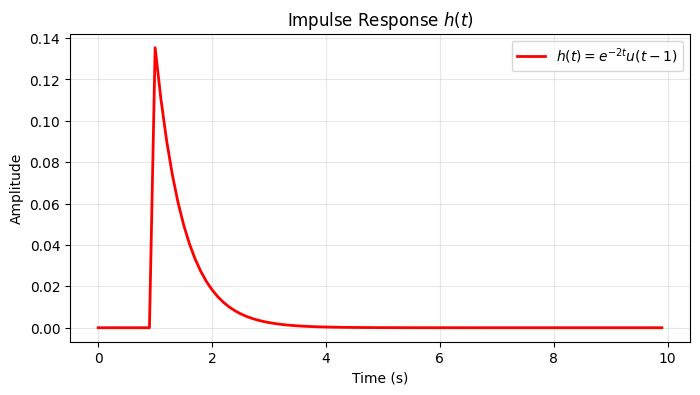

In [22]:
# ----------------------------------
# Part 2: Define and plot the impulse response
# ----------------------------------

# Define impulse response: h(t) = e^{-2t} u(t-1)
h = np.exp(-2 * t) * (t >= 1).astype(float)   # Compute the impulse response using a shifted unit step

# Plot the impulse response
plt.figure(figsize=(8, 4))                   # Create a new figure with specified size
plt.plot(t, h, 'r-', linewidth=2, label='$h(t) = e^{-2t} u(t-1)$')  # Plot the impulse response h(t)
plt.title('Impulse Response $h(t)$')          # Set the plot title
plt.xlabel('Time (s)')                        # Label the x-axis
plt.ylabel('Amplitude')                      # Label the y-axis
plt.grid(True, alpha=0.3)                    # Enable grid with transparency
plt.legend()                                 # Display the legend
plt.show()                                   # Show the figure


### Part 3: Plot Input and Impulse Response Together

<p>
In this part, we visualize both the input signal <b>x(t)</b> and the impulse response <b>h(t)</b> on the same plot for comparison.
</p>

<ol>
<li><b>Purpose</b><br>
    - Displaying both signals together helps us understand how the input overlaps with the system's response.<br>
    - This is especially useful when performing convolution, as the output depends on the interaction of these two signals.
</li>

<li><b>Plotting</b><br>
    - The input signal <code>x(t)</code> is plotted in blue.<br>
    - The impulse response <code>h(t)</code> is plotted in red.<br>
    - Title, axis labels, grid, and legend are added for clarity.
</li>
</ol>

<p>
This combined plot provides a clear visual of how the input and system response relate. Next, we will compute and plot the system output using convolution.
</p>


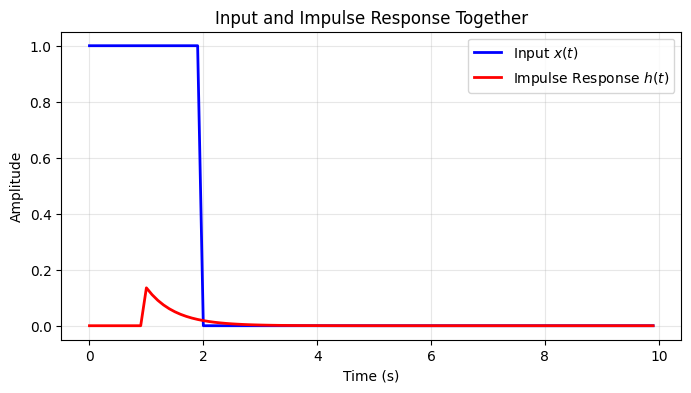

In [23]:
# ----------------------------------
# Part 3: Plot input and impulse response together
# ----------------------------------

plt.figure(figsize=(8, 4))                  # Create a new figure with specified size
plt.plot(t, x, 'b-', linewidth=2, label='Input $x(t)$')   # Plot the input signal x(t)
plt.plot(t, h, 'r-', linewidth=2, label='Impulse Response $h(t)$')  # Plot the impulse response h(t)
plt.title('Input and Impulse Response Together')           # Set the plot title
plt.xlabel('Time (s)')                                      # Label the x-axis
plt.ylabel('Amplitude')                                    # Label the y-axis
plt.grid(True, alpha=0.3)                                  # Enable grid with transparency
plt.legend()                                               # Display the legend
plt.show()                                                 # Show the figure


### Part 4: System Output (Convolution)

<p>
In this part, we compute and plot the output of the system <b>y(t)</b> using numerical convolution.
</p>

<ol>
<li><b>Convolution</b><br>
    - The output of a linear time-invariant (LTI) system is given by the convolution of the input with the system's impulse response:
    <br>
    <math>y(t) = x(t) * h(t)</math>
    <br>
    - In Python, we use <code>np.convolve(x, h, mode='full')</code> to perform discrete convolution.<br>
    - Multiplying by <code>dt</code> approximates the continuous-time convolution integral.
</li>

<li><b>Time Vector for Output</b><br>
    - The convolution result is longer than the original signals.<br>
    - Time vector is defined as <code>t_y = np.arange(len(y)) * dt</code> to match the output length.
</li>

<li><b>Plotting</b><br>
    - The system output <code>y(t)</code> is plotted in green.<br>
    - Title, axis labels, grid, and legend are added for clarity.
</li>
</ol>

<p>
This plot shows the final output of the system in response to the rectangular pulse input. It visually demonstrates how the input signal is shaped by the system's impulse response.
</p>


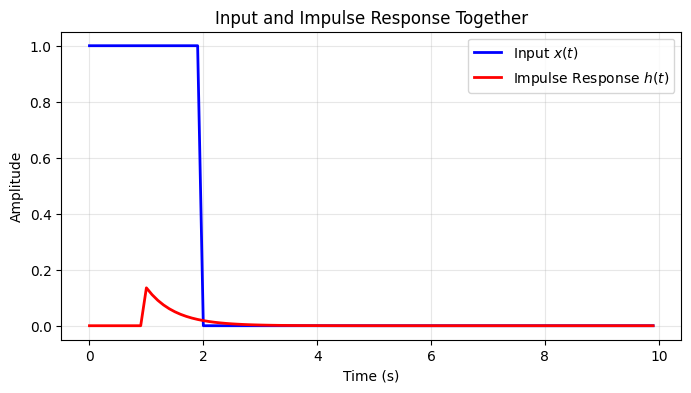

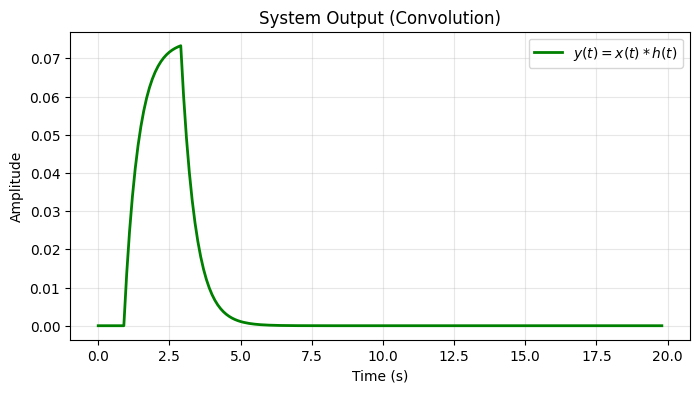

In [24]:
# ----------------------------------
# Part 3: Plot the system output (convolution)
# ----------------------------------

# Numerical convolution
y = np.convolve(x, h, mode='full') * dt      # Compute the numerical convolution y(t) = x(t) * h(t)
t_y = np.arange(len(y)) * dt                # Create the time vector associated with the output signal

# Plot input and impulse response together
plt.figure(figsize=(8, 4))                  # Create a new figure with specified size
plt.plot(t, x, 'b-', linewidth=2, label='Input $x(t)$')   # Plot the input signal x(t)
plt.plot(t, h, 'r-', linewidth=2, label='Impulse Response $h(t)$')  # Plot the impulse response h(t)
plt.title('Input and Impulse Response Together')           # Set the plot title
plt.xlabel('Time (s)')                                      # Label the x-axis
plt.ylabel('Amplitude')                                    # Label the y-axis
plt.grid(True, alpha=0.3)                                  # Enable grid with transparency
plt.legend()                                               # Display the legend
plt.show()                                                 # Show the figure

# Plot the output signal
plt.figure(figsize=(8, 4))                  # Create a new figure for the output signal
plt.plot(t_y, y, 'g-', linewidth=2, label='$y(t) = x(t) * h(t)$')  # Plot the system output y(t)
plt.title('System Output (Convolution)')     # Set the plot title
plt.xlabel('Time (s)')                      # Label the x-axis
plt.ylabel('Amplitude')                    # Label the y-axis
plt.grid(True, alpha=0.3)                  # Enable grid with transparency
plt.legend()                               # Display the legend
plt.show()                                 # Show the figure


# Final Analysis and Discussion

<p>
In this problem, we analyzed the response of a <b>Linear Time-Invariant (LTI)</b> system to a rectangular pulse input using numerical convolution. The objective was to understand how the system's impulse response shapes the input signal over time.
</p>

<hr>

<h4>1. Input Signal Behavior</h4>
<p>
The input signal 
<math>x(t) = u(t) - u(t-2)</math> 
is a rectangular pulse of unit amplitude that exists only in the interval <b>0 ≤ t < 2</b>. 
Outside this interval, the input is zero. This finite-duration signal allows us to clearly observe how the system responds to a sudden onset and offset of energy.
</p>

<hr>

<h4>2. Impulse Response Characteristics</h4>
<p>
The impulse response of the system is given by:
<br>
<math>h(t) = e^{-2t} u(t-1)</math>
</p>
<p>
This response is:
</p>
<ul>
<li><b>Causal</b>: The unit step function <code>u(t-1)</code> ensures the system does not respond before <b>t = 1</b>.</li>
<li><b>Exponentially decaying</b>: The term <code>e<sup>-2t</sup></code> causes the response to decay rapidly over time.</li>
</ul>
<p>
As a result, the system introduces both a <b>delay</b> and a <b>smoothing effect</b> on the input signal.
</p>

<hr>

<h4>3. Convolution Interpretation</h4>
<p>
The system output is computed using the convolution integral:
<br>
<math>y(t) = x(t) * h(t)</math>
</p>
<p>
Numerical convolution approximates this integral by summing shifted and scaled versions of the impulse response over time. Since the impulse response begins at <b>t = 1</b>, the output does not start immediately when the input begins, but instead appears after this delay.
</p>

<hr>

<h4>4. Output Signal Analysis</h4>
<p>
The resulting output signal:
</p>
<ul>
<li>Starts after <b>t = 1</b>, reflecting system causality.</li>
<li>Gradually rises as more of the input overlaps with the impulse response.</li>
<li>Decays smoothly after the input pulse ends, due to the exponential nature of the impulse response.</li>
</ul>
<p>
This behavior clearly demonstrates how convolution combines the shape of the input with the dynamic characteristics of the system.
</p>

<hr>

<h4>5. Conclusion</h4>
<p>
This example illustrates the fundamental role of convolution in analyzing LTI systems. The rectangular input excites the system over a finite interval, while the delayed exponential impulse response determines how the system processes and spreads the input energy over time.
</p>

<p>
Overall, the numerical results and plots are fully consistent with theoretical expectations for causal LTI systems, confirming the correctness of the modeling and implementation.
</p>
